**取回訓練好的神經網路**

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


需要把結構和 weights 取回和再 compile 一次, 所以在 complie 中用到的 optimizer 等還是需要告訴 Keras

In [4]:
from keras.models import model_from_json
from keras.optimizers import SGD

In [5]:
model = model_from_json(open('NN_handwriting.json').read())
model.load_weights('NN_handwriting_weights.h5')

In [6]:
model.compile(loss='mse', optimizer=SGD(lr=0.1))

In [157]:
from keras.datasets import mnist #讀取手寫辨識資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [160]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000, 784)

In [127]:
x = x_test[4522] #試驗

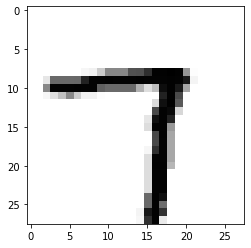

In [128]:
plt.imshow(x.reshape(28,28), cmap='Greys') #變回28x28矩陣，以圖形顯示

In [129]:
model.predict_classes(x.reshape(1,784)) #7

array([7], dtype=int64)

**對神經網路進行改動**

1.  更改神經網路的層數，
2. 更改每一層裡的神經元個數。
3. 更改activation function的種類（relu, leakyrelu, selu, ...)
4. 更改optimizer (RMSProp, adam, ...)
5. 更改 learning rate
6. 你想改的任何東西，可參考keras官方文件：https://keras.io

case1. 

1.使用2個hidden layers

2.每個hidden layers用520個神經元

3.Activation Function 指名 ReLU

In [130]:
from keras.utils import np_utils

In [158]:
y_train1 = np_utils.to_categorical(y_train, 10)
y_test1 = np_utils.to_categorical(y_test, 10)

In [132]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [133]:
from keras import layers

model_1 = Sequential(
    [
        layers.Dense(520, input_dim = 784),
        layers.Activation("relu"),
        layers.Dense(520),
        layers.Activation("relu")
    ]
)

In [142]:
model_1 = Sequential()

In [144]:
model_1.add(Dense(520,input_dim = 784)) 
model_1.add(Activation('relu'))

In [146]:
model_1.add(Dense(520)) #第二層
model_1.add(Activation('relu'))   

In [148]:
model_1.add(Dense(10)) #輸出10個數字，10個神經元
model_1.add(Activation('softmax')) #輸出值機率加總為1

In [150]:
model_1.compile(loss='mse',optimizer = SGD(lr=0.1), metrics = ['accuracy'])

In [155]:
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 520)               408200    
_________________________________________________________________
activation_26 (Activation)   (None, 520)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 520)               270920    
_________________________________________________________________
activation_27 (Activation)   (None, 520)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                5210      
_________________________________________________________________
activation_28 (Activation)   (None, 10)                0         
Total params: 684,330
Trainable params: 684,330
Non-trainable params: 0
_______________________________________________

In [107]:
#408200 
784*520+520

408200

In [162]:
model_1.fit(x_train, y_train1, batch_size=100, epochs = 15) #準確率不高

Epoch 1/15
60000/60000 [==============================] - 6s 99us/step - loss: 0.1291 - accuracy: 0.3541
Epoch 2/15
60000/60000 [==============================] - 6s 97us/step - loss: 0.1283 - accuracy: 0.3583
Epoch 3/15
60000/60000 [==============================] - 6s 101us/step - loss: 0.1278 - accuracy: 0.3607
Epoch 4/15
60000/60000 [==============================] - 6s 96us/step - loss: 0.1294 - accuracy: 0.3525
Epoch 5/15
60000/60000 [==============================] - 5s 90us/step - loss: 0.1237 - accuracy: 0.3810
Epoch 6/15
60000/60000 [==============================] - 6s 98us/step - loss: 0.1139 - accuracy: 0.4299
Epoch 7/15
60000/60000 [==============================] - 6s 99us/step - loss: 0.1117 - accuracy: 0.4410
Epoch 8/15
60000/60000 [==============================] - 6s 96us/step - loss: 0.1143 - accuracy: 0.4282
Epoch 9/15
60000/60000 [==============================] - 5s 88us/step - loss: 0.1136 - accuracy: 0.4317
Epoch 10/15
60000/60000 [=============================

In [116]:
predict = model_1.predict_classes(x_test)

In [117]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='viridis')
    print("神經網路判斷為:", predict[測試編號])

In [118]:
from ipywidgets import interact_manual

In [119]:
interact_manual(test, 測試編號 = (0,9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

**Normalize 數據**

每個輸入值都壓到 [0,1] 中的一個數
，改善ReLU 在大於零的部份就是 $f(x) = x$ 這樣的函數, $x$ 越大, 值就越大, 甚至非常大。

In [163]:
x_train1 = x_train/255
x_test1 = x_test/255

In [164]:
model_1.fit(x_train1, y_train1, batch_size=100, epochs = 15) #運用標準化資料訓練，準確率顯著提升

Epoch 1/15
60000/60000 [==============================] - 6s 92us/step - loss: 0.0628 - accuracy: 0.5827
Epoch 2/15
60000/60000 [==============================] - 6s 100us/step - loss: 0.0304 - accuracy: 0.8152
Epoch 3/15
60000/60000 [==============================] - 7s 117us/step - loss: 0.0223 - accuracy: 0.8594
Epoch 4/15
60000/60000 [==============================] - 7s 121us/step - loss: 0.0186 - accuracy: 0.8817
Epoch 5/15
60000/60000 [==============================] - 7s 113us/step - loss: 0.0163 - accuracy: 0.8970
Epoch 6/15
60000/60000 [==============================] - 6s 105us/step - loss: 0.0148 - accuracy: 0.9069
Epoch 7/15
60000/60000 [==============================] - 6s 103us/step - loss: 0.0136 - accuracy: 0.9138
Epoch 8/15
60000/60000 [==============================] - 7s 114us/step - loss: 0.0128 - accuracy: 0.9189
Epoch 9/15
60000/60000 [==============================] - 6s 103us/step - loss: 0.0121 - accuracy: 0.9233
Epoch 10/15
60000/60000 [======================

In [170]:
predict1 = model_1.predict_classes(x_test1)

In [171]:
def test1(測試編號):
    plt.imshow(x_test1[測試編號].reshape(28,28), cmap='viridis')
    print("神經網路判斷為:", predict1[測試編號])

In [172]:
interact_manual(test1, 測試編號 = (0,9999)) #

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test1(測試編號)>

In [ ]:
model_2 = Sequential
        ( [ layers.Dense(520, input_dim = 784), 
           layers.Activation("relu"), 
           layers.Dense(520), 
           layers.Activation("relu") ] )